In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/data_numeric_normalized.csv'
data = pd.read_csv(csv_file, delimiter=',')

# eliminando adr > 300
indexNames = data[ data['adr'] > 300 ].index


print('indexNames ', indexNames)
data.drop(indexNames , inplace=True)
data.dropna(axis=0, inplace=True)

# eliminando adr <= 0
indexNames = data[ data['adr'] <= 0 ].index

print('indexNames ', indexNames)
data.drop(indexNames , inplace=True)
data.dropna(axis=0, inplace=True)

indexNames  Int64Index([  3712,   7419,   7543,   7606,   7673,   7676,   7718,   7793,   9727,   9728,
            ...
            114535, 114581, 115541, 116150, 116394, 117125, 117792, 118241, 118252, 118515], dtype='int64', length=276)
indexNames  Int64Index([     0,      1,    125,    167,    168,    196,    197,    421,    428,    459,
            ...
            117701, 117901, 117960, 118029, 118142, 118631, 118762, 118963, 119102, 119124], dtype='int64', length=1960)


In [ ]:
one_hot = pd.get_dummies(data['reserved_room_type'], prefix='room')
data = data.drop('reserved_room_type', axis = 1)
data = data.join(one_hot)
print(data)

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  assigned_room_type  booking_changes  deposit_type  agent  days_in_waiting_list  customer_type     adr  required_car_parking_spaces  total_of_special_requests  reservation_status  total_stayed_nights  weekend_nights_proportion  reservation_status_year  reservation_status_month  reservation_status_day  room_0  room_1  room_2  room_3  room_4  room_5  room_6  room_7  room_8
2           1            0          7               2015                   7                        27                          1                        0                     1       1         0       0     1               0                     0                  0                       0               

In [ ]:
one_hot = pd.get_dummies(data['arrival_date_month'], prefix='month')

data = data.drop('arrival_date_month', 1)

data = data.join(one_hot)

print(data)

data['all_children'] = data['children'] + data['babies']
data = data.drop('children', 1)
data = data.drop('babies', 1)

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  assigned_room_type  booking_changes  deposit_type  agent  days_in_waiting_list  customer_type     adr  required_car_parking_spaces  total_of_special_requests  reservation_status  total_stayed_nights  weekend_nights_proportion  reservation_status_year  reservation_status_month  reservation_status_day  room_0  room_1  room_2  room_3  room_4  room_5  room_6  room_7  room_8  month_1  month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12
2           1            0          7               2015                        27                          1                        0                     1       1         0       0     1               0         

In [ ]:
one_hot = pd.get_dummies(data['meal'], prefix='meal')

data = data.drop('meal', 1)

data = data.join(one_hot)

print(data)

In [7]:
one_hot = pd.get_dummies(data['hotel'], prefix='hotel')

data = data.drop('hotel', 1)

data = data.join(one_hot)

print(data)

        is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  assigned_room_type  booking_changes  deposit_type  agent  days_in_waiting_list  customer_type     adr  required_car_parking_spaces  total_of_special_requests  reservation_status  total_stayed_nights  weekend_nights_proportion  reservation_status_year  reservation_status_month  reservation_status_day  room_0  room_1  room_2  room_3  room_4  room_5  room_6  room_7  room_8  hotel_0  hotel_1
2                 0          7               2015                   7                        27                          1                        0                     1       1         0       0     1               0                     0                  0                       0           

In [8]:
print(data.shape)

(117154, 43)


In [10]:
variable_objetivo = data['adr']

data = data.drop('adr', axis=1)

print(data.shape)
print(data.columns)

KeyError: ignored

In [12]:
print(data.shape)
print(data.columns)

(117154, 42)
Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'total_stayed_nights', 'weekend_nights_proportion', 'reservation_status_year', 'reservation_status_month', 'reservation_status_day', 'room_0', 'room_1', 'room_2', 'room_3', 'room_4', 'room_5', 'room_6', 'room_7', 'room_8', 'hotel_0', 'hotel_1'], dtype='object')


In [35]:
X = data.copy()

y = variable_objetivo

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

print('x_train ', x_train)
print('x_test ', x_test)

x_train  [[  60.55702406  -45.30625802  -24.98837326]
 [  68.16207809  -23.34858902   25.23603824]
 [ -16.17162245 -128.26903903    7.01268884]
 ...
 [ -30.13987658  -67.30874446  -27.54876186]
 [  13.09670706  -65.57293089    7.79487561]
 [  59.25095665   38.83734474  -24.45637035]]
x_test  [[-146.9567494    88.38415071   23.08369978]
 [  21.90905722   36.06918433  -25.00634274]
 [-182.2893695    53.87763391   22.87413904]
 ...
 [-196.14251022   54.03392459  -27.54810303]
 [-164.30742445  172.65703904    4.93396034]
 [ 135.67983962   40.92066697   -3.6315289 ]]


In [49]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [50]:
lm = LinearRegression()

model = lm.fit(x_train, y_train)

In [51]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation

scores = cross_val_score(model, X, y, cv=4)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.24794054 0.36992126 0.44196049 0.46213418]


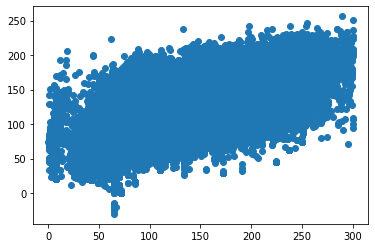

In [52]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=8)
plt.scatter(y, predictions)

In [53]:
accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.41339366993837556


In [58]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=9)
knn_model = knn.fit(x_train, y_train)

In [59]:
scores = cross_val_score(knn_model, X, y, cv=4)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.28962911 0.19031456 0.14198101 0.00700282]


Text(0, 0.5, 'Predictions')

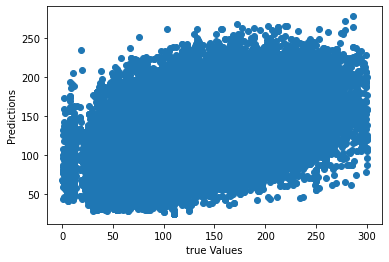

In [60]:
knn_predictions = cross_val_predict(knn_model, X, y, cv=4)
plt.scatter(y, knn_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

In [61]:
accuracy = metrics.r2_score(y, knn_predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.21582131747745337


Cross-validated scores: [0.24794054 0.36992126 0.44196049 0.46213418]
36.09891214347966
0.3684840280996067


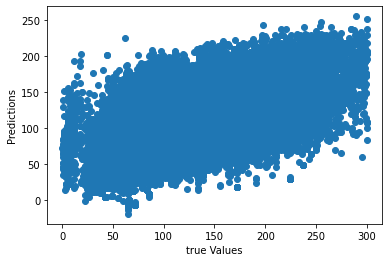

In [65]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)


scores = cross_val_score(model, X, y, cv=4)
print ('Cross-validated scores:', scores)

y_poly_pred = cross_val_predict(model, X, y, cv=4)

plt.scatter(y, y_poly_pred)
plt.xlabel('true Values')
plt.ylabel('Predictions')


rmse = np.sqrt(metrics.mean_squared_error(y,y_poly_pred))
r2 = metrics.r2_score(y,y_poly_pred)
print(rmse)
print(r2)

Cross-validated scores: [0.36255534 0.31419214 0.47626212 0.46441446 0.46278426]
34.72260691988994
0.41572035353310866


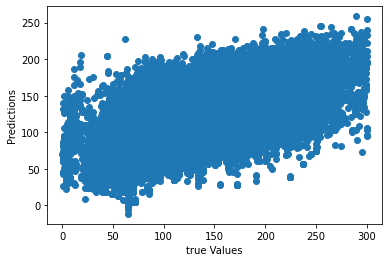

In [68]:
from sklearn.linear_model import Ridge
import numpy as np
ridge = Ridge()

ridge.fit(X,y)

scores = cross_val_score(ridge, X, y, cv=5)
print ('Cross-validated scores:', scores)


ridge_predictions = cross_val_predict(ridge, X, y, cv=5)
plt.scatter(y, ridge_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

rmse = np.sqrt(metrics.mean_squared_error(y, ridge_predictions))
r2 = metrics.r2_score(y,ridge_predictions)
print(rmse)
print(r2)

Cross-validated scores: [0.33032657 0.25471045 0.24116307 0.48308003 0.47630733 0.2292111
 0.30663257 0.44713929]
36.25237694880519
0.3631031744978801


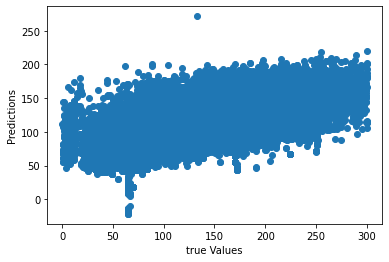

In [70]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X,y)

scores = cross_val_score(lasso, X, y, cv=8)
print ('Cross-validated scores:', scores)


lasso_predictions = cross_val_predict(lasso, X, y, cv=8)
plt.scatter(y, lasso_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

rmse = np.sqrt(metrics.mean_squared_error(y, lasso_predictions))
r2 = metrics.r2_score(y, lasso_predictions)
print(rmse)
print(r2)

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [72]:
elastic=ElasticNet(normalize=False)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [73]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(X,y)   
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67422352.57373993, tolerance: 24174.69543397301
  positive)


Alpha:0.0001, R2:0.44, MSE:1151.80, RMSE:33.94


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66948888.75845209, tolerance: 24174.69543397301
  positive)


Alpha:0.0010, R2:0.44, MSE:1152.09, RMSE:33.94


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57230143.49755027, tolerance: 24174.69543397301
  positive)


Alpha:0.0100, R2:0.44, MSE:1159.97, RMSE:34.06
Alpha:0.1000, R2:0.41, MSE:1211.31, RMSE:34.80
Alpha:0.3000, R2:0.38, MSE:1286.82, RMSE:35.87
Alpha:0.5000, R2:0.35, MSE:1346.07, RMSE:36.69
Alpha:0.7000, R2:0.32, MSE:1393.70, RMSE:37.33
Alpha:1.0000, R2:0.30, MSE:1450.62, RMSE:38.09


In [76]:
elastic=ElasticNet(alpha=0.01).fit(x_train, y_train)
ypred = elastic.predict(x_test)
score = elastic.score(x_test, y_test)
mse = mean_squared_error(y_test, ypred)

print(ypred)
print(score)
print(mse)

[104.16364102 101.21264545 106.03263129 ... 106.19417622 102.14551516
  98.28304786]
0.007961443941857493
2042.0323420273583


In [77]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)